In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'

In [3]:
tables = pd.read_html(url)
tables

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [4]:
type(tables)

list

In [5]:
df = tables[0]
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [6]:
df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [7]:
df = df.astype({'sol':float, 'ls': float})

In [8]:
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

In [9]:
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10.0,155.0,6,-75.0,739.0
1,13,2012-08-17,11.0,156.0,6,-76.0,740.0
2,24,2012-08-18,12.0,156.0,6,-76.0,741.0
3,35,2012-08-19,13.0,157.0,6,-74.0,732.0
4,46,2012-08-20,14.0,157.0,6,-74.0,740.0


In [10]:
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                        float64
ls                         float64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

# Questions

In [21]:
#How many months exist on Mars?
#Months in Mars
len(df['month'].unique())

12

In [23]:
#Months in Earth
len(df['terrestrial_date'].dt.to_period('M').unique())

67

In [28]:
#How many Martian(and not Earth) days worth of data exist in the scraped dataset?
len(df['sol'].unique())

1867

In [14]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)?
#Get the answer by averaging the minimum daily temperature of all the months.
#Plot the results as a bar chart.
temp_df = df.groupby('month').mean()
temp_df

,id,sol,ls,min_temp,pressure
month,,,,,
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
6,735.306122,750.829932,164.897959,-75.299320,745.054422
7,714.549296,715.105634,194.894366,-72.281690,795.105634
8,718.078014,795.333333,224.347518,-68.382979,873.829787
9,785.843284,861.186567,254.052239,-69.171642,913.305970


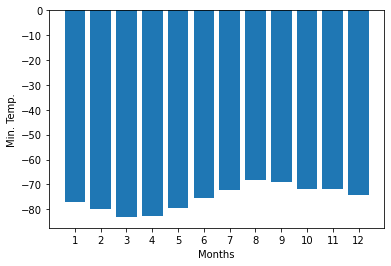

In [15]:
#Bar Chart
months = np.arange(1, 13, 1)

x = months
y = temp_df['min_temp']

plt.bar(x,y)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Min. Temp.')
plt.show()

Coldest = March

Warmest = August

In [26]:
#Which months have the lowest and the highest atmospheric pressure on Mars?
#Get the answer by averaging the daily atmospheric pressure of all the months.
#Plot the results as a bar chart.
temp_df = df.groupby('month').mean()
temp_df

,id,sol,ls,min_temp,pressure
month,,,,,
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
6,735.306122,750.829932,164.897959,-75.299320,745.054422
7,714.549296,715.105634,194.894366,-72.281690,795.105634
8,718.078014,795.333333,224.347518,-68.382979,873.829787
9,785.843284,861.186567,254.052239,-69.171642,913.305970


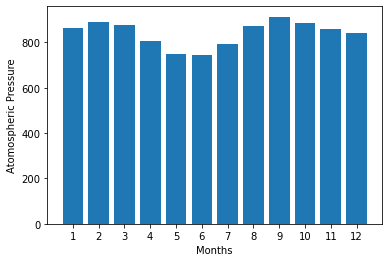

In [27]:
#Bar Chart
months = np.arange(1, 13, 1)

x = months
y = temp_df['pressure']

plt.bar(x,y)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Atomospheric Pressure')
plt.show()

Lowest = June

Highest = September

In [17]:
#About how many terrestrial (Earth) days exist in a Martian year?
#That is, in the time that Mars circles the Sun once, how many days elapse on Earth?
#Visually estimate the result by plotting the daily minimum temperature.